# Kaggle Challenge 
## #1 Titanic. Machine Learning from Disaster (with EDA)

### 1. 필요한 모듈 불러오기(numpy, pandas)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. train data 불러오기

In [2]:
raw_data = pd.read_csv('/home/lifeofpy/Desktop/Titanic/train.csv', engine='python')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. 변수별 결측치 현황 확인

In [3]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
len(raw_data)

891

독립변수의 총 개수는 891개인데, Cabin 변수의 결측치가 687개라는 점을 감안하여 Cabin 변수는 분석 대상에서 제외하도록한다.

### 4.  결측치 처리

(1) Cabin 변수를 분석대상에서 제외했으므로, 해당 열을 삭제해준다.

In [5]:
del raw_data['Cabin']

In [6]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


(2) Age 변수는 결측치가 177개 있으나, 결측치 행 제거를 하지 않고 나이의 평균값으로 결측치를 채우기로 했다.

In [7]:
raw_data['Age'].mean()

29.69911764705882

타이타닉 탑승객 나이의 평균은 29.6세이다.

In [8]:
raw_data['Age'].fillna(value=raw_data['Age'].mean(), inplace=True)
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


(3) Embarked (선착장) 변수에 대해서는 결측치가 2개이므로, None 값으로 대체해준다.

In [9]:
raw_data['Embarked'].fillna(value='None', inplace=True)
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


------------------------------------------------------------------------------------

### 5. 탐색적 분석(EDA)을 통한 데이터 시각화

내가 세운 가설이 신빙성이 있는지 탐색적 분석을 통해 알아보자!

[1] 남성보다 여성이 생존율이 더 높을 것이다.

[2] 승객 등급이 높을수록 생존율이 더 높을 것이다.

[3] 함께 탑승한 자녀와 부모의 수가 많을수록 생존율이 더 높을 것이다.

[4] 나이가 어릴수록 생존율이 더 높을 것이다.

☞ 생존율의 높고 낮음의 기준을 정하기 위해서는 전체 탑승객 기준의 생존율을 알아야 한다.

### 전체 탑승객 기준의 생존율 구하기

In [10]:
people_survived = 0
for i in range(len(raw_data)):
    if raw_data['Survived'][i] == 1:
        people_survived += 1

In [11]:
# 생존한 사람의 수
people_survived

342

In [12]:
survival_rate = people_survived/len(raw_data) * 100
survival_rate

38.38383838383838

☞ 전체 탑승객 기준의 생존율은 38.3%이다. 총 탑승객 중 38% 가 타이타닉에서 살아나올 수 있었다.

In [13]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 가설 1) 남성보다 여성이 생존율이 높을 것이다.

<AxesSubplot:ylabel='None'>

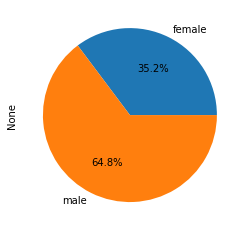

In [14]:
df_count = raw_data.groupby(['Sex']).size()
df_count.plot.pie(y='Gender Rate', autopct='%.1f%%')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

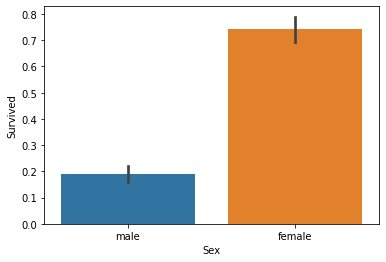

In [15]:
sns.barplot(x='Sex', y='Survived', data=raw_data)

전체 탑승객 중 남성은 64.8%, 여성은 35.2%였다. 
생존율의 경우 성별로 비교해야 하므로, 남성 안에서의 남성의 생존율, 여성 중에서의 여성의 생존율로 나눠 구해야한다.

In [16]:
raw_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


여성의 생존율은 74.2%, 남성의 생존율은 18.8%로 여성의 생존율이 월등히 높았다. 따라서 해당 가설은 수용되었다.

### 가설 2) 승객 등급이 높을수록 생존율이 높을 것이다.

In [17]:
grade_data = raw_data.groupby('Pclass').mean()

In [18]:
grade_data

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

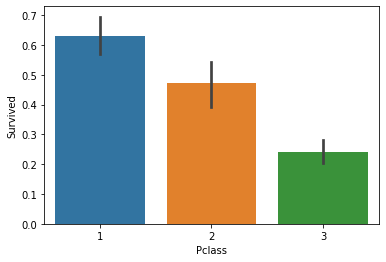

In [19]:
sns.barplot(x='Pclass', y='Survived', data=raw_data)

1등급 승객의 생존율은 62.9%이며, 2등급, 3등급 순으로 생존율이 높다. 따라서 해당 가설은 수용되었다.

### 가설 3) 함께 탑승한 자녀와 부모의 수가 많을수록 생존율이 더 높을 것이다.

In [20]:
raw_data.groupby('Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,31.604368,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.779771,1.084746,46.778180
2,416.662500,0.500000,2.275000,19.089243,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

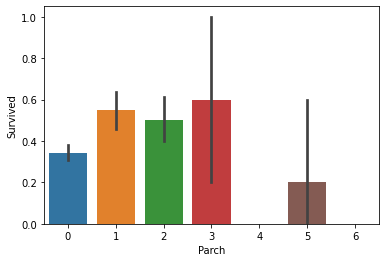

In [25]:
sns.barplot(x='Parch', y='Survived', data=raw_data)

함께 탑승한 자녀와 부모의 수가 3명인 경우, 생존율이 60%로 가장 높았고, 가장 많은 6명의 경우에 생존율이 0% 였기 때문에 해당 가설은 기각되었다.

### 가설 4) 나이가 어릴수록 생존율이 더 높을 것이다.

<AxesSubplot:>

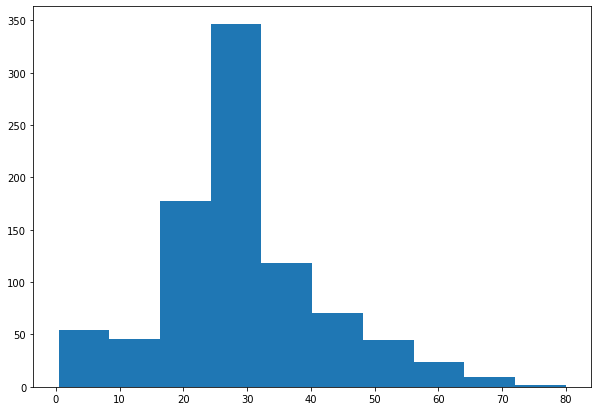

In [21]:
raw_data['Age'].hist(figsize=(10,7), grid=False)

위 히스토그램은 전체 탑승객의 나이 분포를 나타낸다. 30대가 가장 많은 형태를 띄고 있다.

더 명확한 기준을 위해, '나이가 어리다'의 기준을 10대 이하로 잡아보자. 그리고 나이가 어린(13살 이하) 생존자라는 파생변수(young_survivors)를 하나 만들어서, 나이가 어린 생존자의 비율과 그렇지 않은 생존자의 비율을 비교해보자.

In [22]:
raw_data['young_survivors'] = 0
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,young_survivors
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [23]:
young_people = 0
for i in range(len(raw_data)):
    if raw_data['Age'][i] <= 13:
        young_people += 1
        if raw_data['Survived'][i] == 1:
            raw_data['young_survivors'][i] += 1
raw_data[30:60]

/home/lifeofpy/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,young_survivors
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,C,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C,0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.699118,0,0,335677,7.7500,Q,0
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,S,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C,0
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,S,0
36,37,1,3,"Mamee, Mr. Hanna",male,29.699118,0,0,2677,7.2292,C,0
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,S,0
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,S,0
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,C,0


이를 통해 young_survivors 에 1의 값을 가지고 있으면 나이가 어린데(13살 이하) 생존한 사람이며, 전체 나이가 어린 사람의 비율에서 생존한 사람을 쉽게 구할 수 있는 지표가 된다.

In [26]:
young = raw_data.groupby('young_survivors').mean()
young

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
young_survivors,,,,,,,
0,445.023557,0.353357,2.302709,30.954940,0.505300,0.336867,32.372948
1,465.738095,1.000000,2.428571,4.313571,0.880952,1.285714,28.793255


<AxesSubplot:xlabel='young_survivors', ylabel='Survived'>

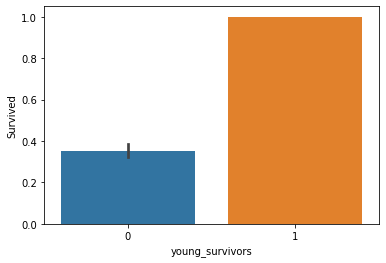

In [29]:
sns.barplot(x='young_survivors', y='Survived', data=raw_data)

분석 결과, 나이가 13살 이하라면 생존확률이 100% 가 나왔다. 따라서 나이가 어릴수록 생존율이 높다는 가설은 수용되었다.